# **ImageNet and AlexNet**

**Required Reading**
- [ImageNet Paper](https://www.researchgate.net/profile/Li_Jia_Li/publication/221361415_ImageNet_a_Large-Scale_Hierarchical_Image_Database/links/00b495388120dbc339000000/ImageNet-a-Large-Scale-Hierarchical-Image-Database.pdf)
- [AlexNet Paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

**Additional Reading/Viewing**

- [Great Article on Fei Fei Li and ImageNet](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/)
- [Great Talk from Andrej Kerpathy](https://www.youtube.com/watch?v=f6ZKaBm3cXU)

---

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for viewing this notebook:

````
jt -t grade3 -cellw=90% -fs=14 -tfs=14 -ofs=14
````

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:

````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

---

## **Why Didn't Deep Learning Take Off in the Early 2000s?**

- In our discussion of Convolutional Networks we looked at Yann Lecun's **LeNet-5 Convolutional Neural Network** that crushed the mnist benchmark way back in 1998.

![](../graphics/lenet_5_screenshot.png)

- Now, as you may know, **deep learning** didn't really take off until ~2012. 
- What took so long? 
- How are modern deep learning models different than LeNet-5?
- Let's discuss a bit of history here, and then try to answer these questions. 

---

##  **Fei-Fei Li and ImageNet**

![](../graphics/fei_fei_li-01.png)

- Beginning around 2006, Fei Fei Li, then a new professor at the University of Illinois Urbana-Champaign, began working on building the largest labeled image dataset ever constructed. [Great Article on Fei Fei Li and ImageNet](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/).
- She chose to use the [WordNet lexical database](https://en.wikipedia.org/wiki/WordNet) for her class labels, and to focus on finding images for each "synset" in Wordnet. 
- Li first tried hiring undergraduate students to perform annotation, but quickly found that this appraoch simple would not achieve the scale she needed, and instead used Amazon Mechanical Turk. 
- ImageNet was first published in 2009, and quickly developed into a public computer vision competition, the ImageNet Large Scale Visual Recognition Competition (ILSVRC). 
- ILSVRC used a subset of 1000 imaget classes, and included ~1.2M training images. 

---

- So, perhaps not surprisingly, ILSVRC turned out to be quite difficult. 
- The best performance achieved in 2010 was a top-5 test set error rate of **28.2%**. Top-5 means that the correct answer was one of the top five answers given by the network. 
- In 2011, the top-5 error rate dropped to **25.8%**, [achieved by a team from Xerox](http://image-net.org/challenges/LSVRC/2011/results) using SIFT and Fisher Vectors (FVs).
- And then...this happened:

![](../graphics/hinton_krizhevinsky-01.png)

- SuperVision, a team from the University of Toronto, led by Geoff Hinton (Remember Him?) **reduced the top-5 test set error by around 40%, down to 15.4%.**
- The model they used is today often called "AlexNet" after Alex Krizhevsky
- So, how did Hinton's team acheive such a huge increase in performance? What type of magic was afoot? 
- Let's have a closer look at the [AlexNet Paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).
- Hinton's team used a deep neural network, not all that different from LeNet-5:

![](../graphics/alexnet_paper_screenshots/architecture.png)

- This figure drives be crazy becuase the top part is cropped off in the original paper, one of these days I'm going to make a non-cropped version. 
- There's also apparently an error in the paper - the input image size should be 227x227. 
- Let's take some time to talk throught the **Alexnet** architecture. 
- First, this figure shows 2 copies of most layers - **why?**
- Next, why is our output of dimenion 1000? 


![](../graphics/spacer_small-01.png)

## **AlexNet Walkthrough**
- Now, let's work through a detailed analysis of alexnet. 
- For each layer, how many free parameters do we have? 
- How much memory does each layer require? 
- How much computation does each layer require?
- The AlexNet architecture is drawn a little differently than LeNet-5 was, let's think through this first borrowing some slides from [Stanford's CS 231n: Convolutional Neural Networks for Visual Recognition](https://www.youtube.com/watch?v=LxfUGhug-iQ&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=7).
- I highly recommend this course (available online) if you plane to do any further work in Deep Learning for Computer Vision.

![](../graphics/cs_231n_cnn_slides/cs_231n_1.png)

- A nice way to think about the convolutional operations we apply in neural networks is **operations on volumes**, as opposed to the operations on vectors we saw with regular neural networks.


---


![](../graphics/cs_231n_cnn_slides/cs_231n_2.png)

---

![](../graphics/cs_231n_cnn_slides/cs_231n_3.png)

---

![](../graphics/cs_231n_cnn_slides/cs_231n_4.png)

---

![](../graphics/cs_231n_cnn_slides/cs_231n_5.png)

---

- Alright, let's walk through AlexNet. 
- We'll use a **simplified AlexNet**, where we merge Alex's two GPU pipelines into one:

![](../graphics/simplified_alexnet.png)

- At each step through alexnet, we apply some operation to some input data tensor. 
- Let's walk through one layer at a time, and compute the required memory for our data, the number of parameters in our operation, the required memory for these parameters, and the number of floating point operations (FLOPs)
- Let's assume 32-bit floating point numbers, and ignore bias units for now. 
- Also, the Local Response Normalization layers (NORM1, NORM2) used in AlexNet aren't really used anymore, so we won't spend to much on these.

![](../graphics/alexnet_walkthrough_partial.png)

![](../graphics/spacer_small-01.png)

![](../graphics/spacer_small-01.png)

---

- Alright, hopefully you landed on some numbers like these:

![](../graphics/alexnet_walkthrough_full.png)

- [Here's](https://docs.google.com/spreadsheets/d/1aCHbSCBioP4wrgxsVOEwvUcLMtZImkaDOwDqQa8iBE4/edit?usp=sharing) a link to the google sheet I worked out of to make this table.
A few notes on the table: 
- *Assume 32 bit floating point
- **Ignoring Baises
- Simplified here means that we've merged the two GPU "branches" of alexnet into a single pipeline
- Note that you may see 0.7 GLOPs reported for AlexNet - this is for the non-simplified version
- I profiled Fredrick Kratzert's implementation of alexnet, tensorflow says ~1.6 GFLOPs, I'm guessing that this number is less than our 2.2 GFLOPs due to Tensorflow optimizations - but I remain curious here - please send me an email if you know more about this. 
- Note that we need to double the parameter memory requirements during training to hold our gradient values. 
- Finally, this is for a single image, and typically during training we'll pass in minibatches. 

## This sounds like a lot of computation, how much is 2.2 GFLOPs?

- Well, for reference Apple's latest iPhone chip, the A12 includes a 5 TOP Neural Network chip. (That's alot of AlexNet's in your Pocket :))
- And Nvidia's Titan V GPU is capable of 110 Teraflops. 

![](../graphics/spacer_small-01.png)

![](../graphics/spacer_small-01.png)

## **Three Final Interesting AlexNet Ideas**

### **1. Rectified Linear Activation Functions**

![](../graphics/relu_activations-01.png)

- The SuperVision team used an activation function that had not been widely used in neural networks before - Rectified Linear Units (ReLU). 
- From [Goodfellow section 6.3.1](https://www.deeplearningbook.org/contents/mlp.html): *"These units are easy to optimize because they are so similar to linear units. The only diﬀerence between a linear unit and a rectiﬁed linear unit is that a rectiﬁed linear unit outputs zero across half its domain. This makes the derivatives through a rectiﬁed linear unit remain large whenever the unit is active. The gradients are not only large but also consistent. The second derivative of the rectifying operation is 0 almost everywhere, and the derivative of the rectifying operation is 1 everywhere that the unit is active."*

### **2. Dropout**

![](../graphics/dropout-01.png)

---

### **3. Dataset Augmentation**

![](../graphics/data_augmentation-01.png)

- Data augmentation is a great way to make our dataset appear larger than it actually is. 
- By implementing **label preserving transforms** on our images such as crops, shifts, and small color changes, we can reduce overfitting. 
- See [Goodfellow 7.4](https://www.deeplearningbook.org/contents/regularization.html) for more details. 

---

### **Augmentation Example using Tensorflow Eager Execution**
- Tensorflow has some nice built-in augmentation methods, here's an example using a few of these methods.

In [1]:
%pylab inline
import sys
import tensorflow as tf
import cv2

Populating the interactive namespace from numpy and matplotlib


/Users/stephenwelch/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Eager exection is great for experimentation, allowing us to easily 
# more back and forth between python and tensorflow. 
tf.enable_eager_execution()

- Load up bbc-1k data from programming challenge:

In [3]:
#Load some challenge data.
sys.path.append('../challenge/')
from data_loader import data_loader

In [4]:
input_image_size = (227, 227)
channel_means = np.array([147.12697, 160.21092, 167.70029])
label_indices = {'brick': 0, 'ball': 1, 'cylinder': 2}
labels_ordered = list(label_indices)

#Load up data from image files. 
data = data_loader(label_indices = label_indices,
                   channel_means = channel_means, 
                   train_test_split = 0.7,
                   input_image_size = input_image_size, 
                   data_path = '../data')

Loaded 700 training examples and  300 testing examples. 


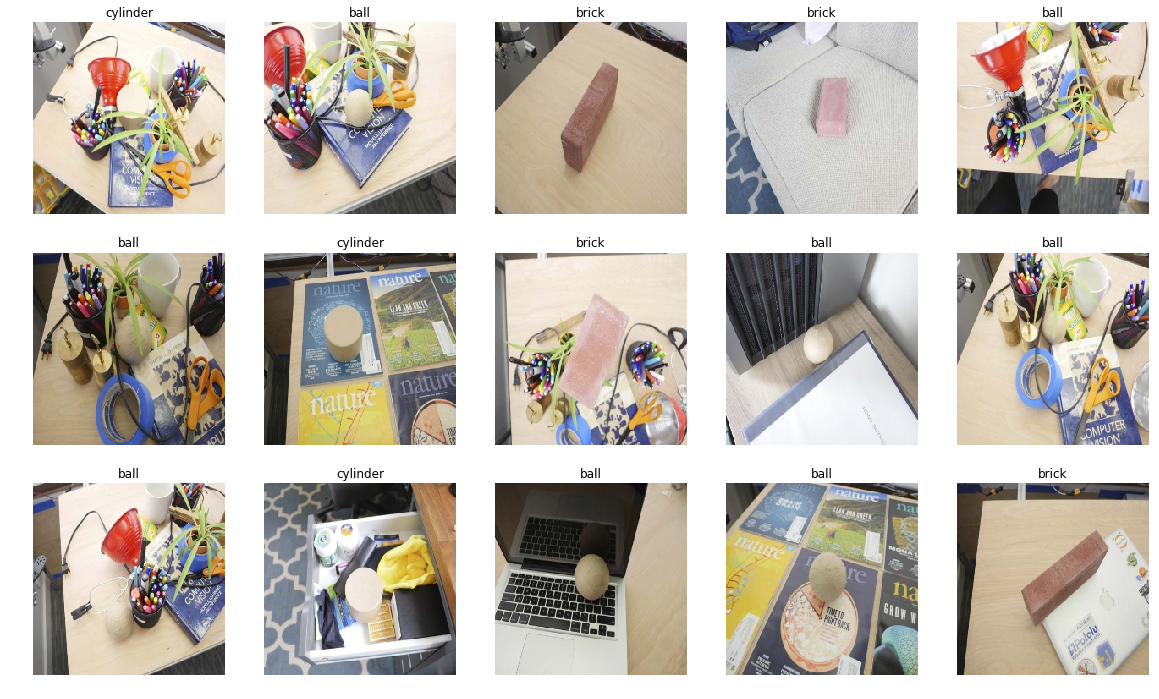

In [5]:
#Let's visualize a few examples
fig = figure(0, (20, 12))
for i in range(15):
    fig.add_subplot(3,5,i+1)
    image = cv2.cvtColor((data.train.X[i, :, :, :] + channel_means).astype('float32'), 
                        cv2.COLOR_BGR2RGB)/255.0
    imshow(np.clip(image, 0, 1))
    title(np.array(labels_ordered)[data.train.y[i, :] == 1 ][0]);
    axis('off')

- First, we'll use `tf.image.crop_and_resize` to apply random crops and resizes to a minibatch.

In [6]:
minibatch_size = 4

#Some parameters for cropping
cropping_scale = 0.1
cropping_offset = 0.15
cropping_limits = (0, 0.3)
box_ind = np.arange(minibatch_size)
crop_size = input_image_size

#Randomply choose crops and clip
crops = np.random.randn(minibatch_size, 4)
crops[:, :2] = np.clip(cropping_scale*crops[:, :2] + cropping_offset, 
                       cropping_limits[0], 
                       cropping_limits[1])
crops[:, 2:] = 1 - np.clip(cropping_scale*crops[:, 2:] + cropping_offset, 
                           cropping_limits[0], 
                           cropping_limits[1])

In [7]:
X = data.train.X[:minibatch_size, :, :, :]
distorted_images = tf.image.crop_and_resize(X, crops, box_ind, crop_size)

In [8]:
#using eager execution, we can get numpy arrays out of our tensors by just calling .numpy()!
distorted_images.numpy().shape

(4, 227, 227, 3)

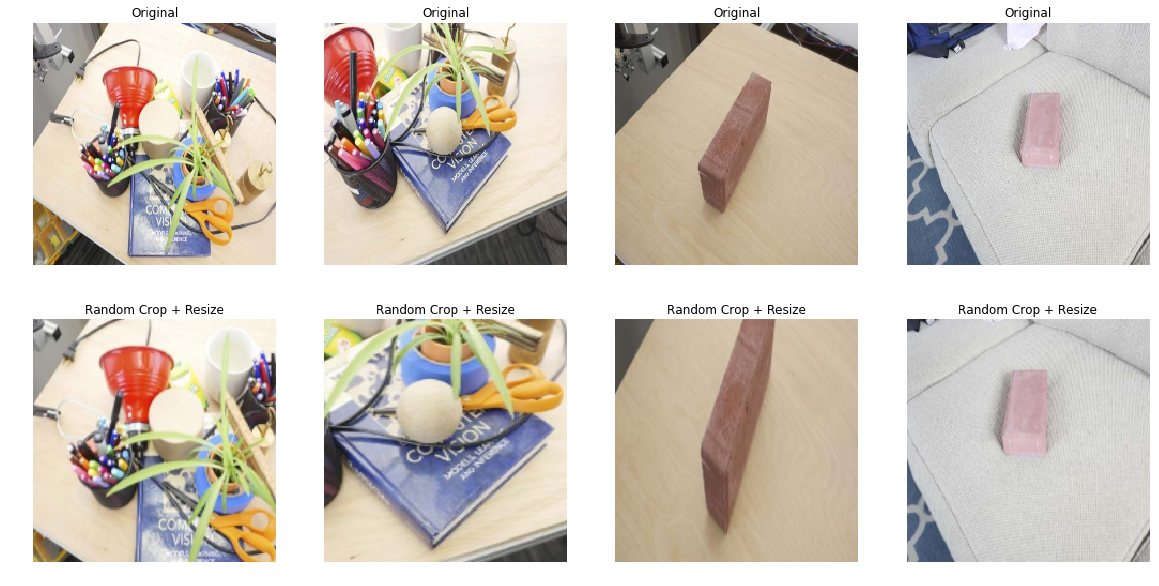

In [9]:
fig = figure(0, (20, 10))
for i in range(4):
    
    fig.add_subplot(2, 4, i+1)
    imshow(cv2.cvtColor((X[i, :, :, :] + channel_means).astype('float32'), 
                        cv2.COLOR_BGR2RGB)/255)
    axis('off'); title('Original')
    
    fig.add_subplot(2, 4, i+5)
    distorted_image = cv2.cvtColor((distorted_images.numpy()[i, :, :, :] + channel_means).astype('float32'), 
                        cv2.COLOR_BGR2RGB)/255
    imshow(np.clip(distorted_image, 0, 1.0))
    axis('off'); title('Random Crop + Resize')

- Now we'll add a few more label-preserving transforms including: 
    - random left/right flipping (makes sense for some problems but not others, not a good idea on mnist!)
    - random brightness, contrast, and color (hue) changes. 

In [10]:
distorted_images = tf.image.random_flip_left_right(distorted_images)
distorted_images = tf.image.random_brightness(distorted_images, max_delta = 63)
distorted_images = tf.image.random_contrast(distorted_images, lower = 0.2, upper = 1.8)
distorted_images = tf.image.random_hue(distorted_images, max_delta = 0.1)

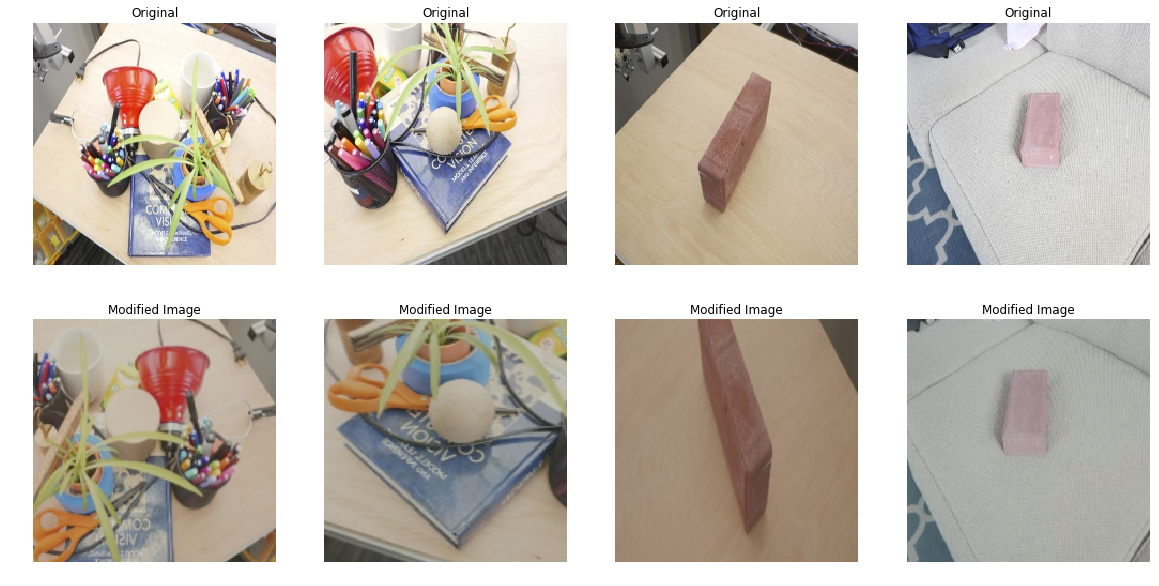

In [11]:
fig = figure(0, (20, 10))
for i in range(4):
    
    fig.add_subplot(2, 4, i+1)
    imshow(cv2.cvtColor((X[i, :, :, :] + channel_means).astype('float32'), 
                        cv2.COLOR_BGR2RGB)/255)
    axis('off'); title('Original')
    
    fig.add_subplot(2, 4, i+5)
    distorted_image = cv2.cvtColor((distorted_images.numpy()[i, :, :, :] + channel_means).astype('float32'), 
                        cv2.COLOR_BGR2RGB)/255
    imshow(np.clip(distorted_image, 0, 1.0))
    axis('off'); title('Modified Image')

---

## **AlexNet Results**

![](../graphics/alexnet_results-01.png)

---

## **Transfer Learning**

- On particularly exciting thing about the AlexNet results is how adaptable deep models are to other computer vision problems. 
- [Razavian et. al.](https://arxiv.org/pdf/1403.6382.pdf) and [Donahue et. al.](https://arxiv.org/pdf/1310.1531.pdf) show that "off-the-shelf" CNNs plus a simple linear classifier outperform existing state of the art accross many computer vision tasks. 

![](../graphics/transfer_learning.png)

![](../graphics/spacer_small-01.png)

---

## ** Final Historical Note**

![](../graphics/lenet_vs_alexnet-01.png)

**References/Assumptions**
- Slide inspired from min 38 of [great talk from Andrej Kerpathy](https://youtu.be/f6ZKaBm3cXU).
- 267 MHz Pentium II single core processor, 1 floating point operation per clock cycle (shoot me an email if you have a better estimate. A couple somewhat relevant sources: [1](https://www.alternatewars.com/BBOW/Computing/Computing_Power.htm) [2](https://projects.ncsu.edu/hpc/Courses/1arch.html)
- GTX 580 GPU FLOPS from [here](https://www.techpowerup.com/gpu-specs/geforce-gtx-580.c270).
- Back of the envelope LeNet math: `5*5*1*28*28*6*2 + 5*5*6*10*10*16*2 + 16*5*5*120*2 + 120*84*2 + 84*2`


---

- As you can see above, remarkably little changed algorithmically between 1998 and 2012. 
- ReLU and dropout are helpful, but not critical for deep learning. 
- And as [Andrej Kerpathy](https://youtu.be/f6ZKaBm3cXU) points out, these two changes both just involve setting something to zero! :)
- In fact you could argue that, **everything we needed for deep learning was in place and known in 1998!**
- Goodfellow has some interesting things to say about this: 


*"At this point [2006], deep networks were generally believed to be very diﬃcult to train. We now know that algorithms that have existed since the 1980s work quite well, but this was not apparent circa 2006. The issue is perhaps simply that these algorithms were too computationally costly to allow much experimentation withthe hardware available at the time."*

- Deep Learning, Ian Goodfellow, Section 1.2.1

*"Convolutional nets were some of the ﬁrst working deep networks trained with back-propagation. It is not entirely clear why convolutional networks succeeded when general back-propagation networks were considered to have failed. It may simply be that convolutional networks were more computationally eﬃcient than fully connected networks, so it was easier to run multiple experiments with them and tune their implementation and hyperparameters. Larger networks also seem to be easier to train. With modern hardware, large fully connected networks appear to perform reasonably on many tasks, even when using datasets that were available and activation functions that were popular during the times when fully connected networks were believed not to work well. It may be that the primary barriers to the success of neural networks were psychological (practitioners did not expect neural networks to work, so they did not make a serious eﬀort to use neural networks). Whatever the case, it is fortunate that convolutional networksperformed well decades ago. In many ways, they carried the torch for the rest of deep learning and paved the way to the acceptance of neural networks in general."*

- Deep Learning, Ian Goodfellow, Section 9.11